# Contrast Enhancement
In this process, we will implement the contrast enhancement algorithm on a low contrast image using `Gray Level Slicing Transformation` technique.

Acknowledge:
- The code algorithm is inspired from following links:
[Image Processing, "Part 3: Intensity Transformation and Spatial Filters"](https://www.philadelphia.edu.jo/academics/hhardan/uploads/Image_Processing-ch3_part_3.pdf) by Hanan Hardan
- The image was taken from following links:
[Low Contrast Image](https://unsplash.com/s/photos/low-contrast)

By:
Denny Alvito Ginting
2440101300

## Importing Libraries

In [ ]:
# OpenCV Library
import cv2

# Mathematical Function
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow

## Importing image

In [ ]:
image = cv2.imread('/content/low-contrast-image.jpg')

## Showing image

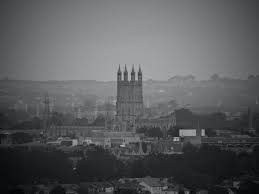

In [ ]:
cv2_imshow(image)

## Gray Scaling the Image
Following image seems like it has been gray scaled, but let's perform gray scaling process from `OpenCV` to make sure.

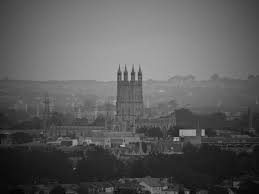

In [ ]:
grayscale_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(grayscale_img)

> Yep, seems like the image doesn't change too much.

## Exploring the Image
We will do some process as such:
- Image Shape
- The Histogram Intensity Visualization before and after histogram transformation

In [ ]:
print(f'The Image Shape is: {image.shape}')

The Image Shape is: (194, 259, 3)


### Count the Intensity

In [ ]:
# Count the intensity on pixel
intensityCounter = np.zeros(256, dtype=int)

# Taking the coordinate from grayscaled-image
height = grayscale_img.shape[0]
width = grayscale_img.shape[1]

# Count the intensity by iterating through the image's pixel
for i in range(height):
  for j in range(width):
    intensityCounter[grayscale_img[i][j]] += 1

### Visualizing the Histogram (Before Transformation)

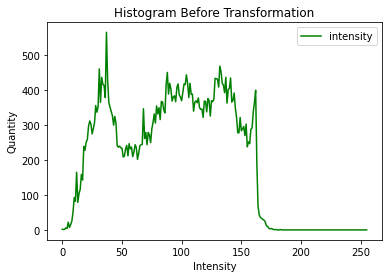

In [ ]:
plt.figure(1)
plt.title('Histogram Before Transformation')
plt.plot(intensityCounter, 'g', label = 'intensity')
plt.legend(loc = 'best')
plt.xlabel('Intensity')
plt.ylabel('Quantity')
plt.show()

## Gray Slicing for the First Transformation
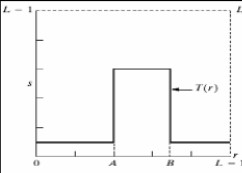

For this transformation, the following grey-level transformations (grey-level slicing) highlight the range [A, B] of gray levels. The rest of the “levels range” will be reduced to a constant level. 

In [ ]:
first_transformation = grayscale_img.copy()
height = first_transformation.shape[0]
width = first_transformation.shape[1]

"""
Approach:

If the pixel intensity in the old image is between (100 to 200)
then we will convert it to 255 (White)

The range of interest in the chosen pixel intensity is optional but in this case
i will choose from 100 to 200, it is also the same with the conversion,
doesn't have to be 255

Otherwise will be converted to 0 (Black)

"""
def first_transform(first_transformation, height, width):
  for i in range(height):
    for j in range(width):
      pixelIntensity = first_transformation[i][j]

      if pixelIntensity >= 100 and pixelIntensity <= 200:
        first_transformation[i][j] = 255
      else:
        first_transformation[i][j] = 0
  
  return first_transformation

transformation = first_transform(first_transformation, height, width)

### Comparing Before and After First Transformation

#### Count the Intensity

In [ ]:
def countIntensity(transformation,height, width):
  intensityCounter = np.zeros(256, dtype=int)
  for i in range(height):
    for j in range(width):
      intensityCounter[transformation[i][j]] += 1
  
  return intensityCounter

In [ ]:
height = transformation.shape[0]
width = transformation.shape[1]

intens_ctr = countIntensity(transformation, height, width)

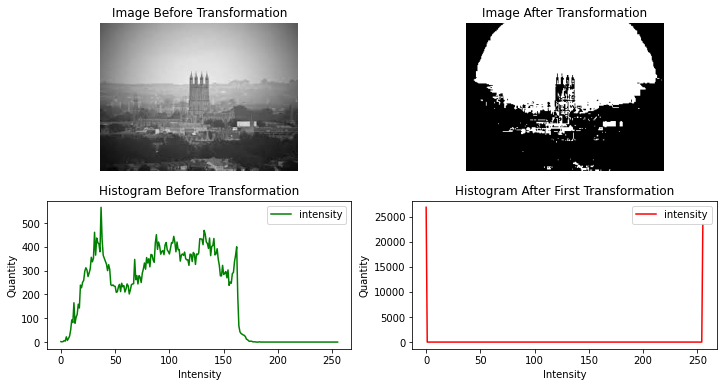

In [ ]:
plt.figure(figsize=(12,6))
# Before Transformation

# Image
plt.subplot(2,2,1)
plt.title('Image Before Transformation')
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')

# Histogram
plt.subplot(2,2,3)
plt.title('Histogram Before Transformation')
plt.plot(intensityCounter, 'g', label = 'intensity')
plt.legend(loc = 'best')
plt.xlabel('Intensity')
plt.ylabel('Quantity')

# After First Transformation

# Image
plt.subplot(2,2,2)
plt.title('Image After Transformation')
plt.imshow(transformation, cmap='gray')
plt.axis('off')

# Histogram
plt.subplot(2,2,4)
plt.title('Histogram After First Transformation')
plt.plot(intens_ctr, 'r', label = 'intensity')
plt.legend(loc = 'best')
plt.xlabel('Intensity')
plt.ylabel('Quantity')
plt.show()

## Gray Slicing for the Second Transformation
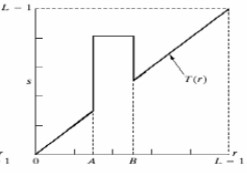

For this transformation, the following grey-level transformation (grey-level slicing) highlights the range [A, B] of gray levels. The rest of the “levels range” will be preserved.

In [ ]:
second_transformation = grayscale_img.copy()
height = second_transformation.shape[0]
width = second_transformation.shape[1]

"""
Approach:

If the pixel intensity in the old image is between (100 to 200)
then we will convert it to 255 (White)

Otherwise will be preserved as it is

"""
def second_transform(second_transformation, height, width):
  for i in range(height):
    for j in range(width):
      pixelIntensity = second_transformation[i][j]

      if pixelIntensity >= 100 and pixelIntensity <= 200:
        second_transformation[i][j] = 255
  
  return second_transformation

transformation_2 = second_transform(second_transformation, height, width)

In [ ]:
height = transformation_2.shape[0]
width = transformation_2.shape[1]

intens_ctr_2 = countIntensity(transformation_2, height, width)

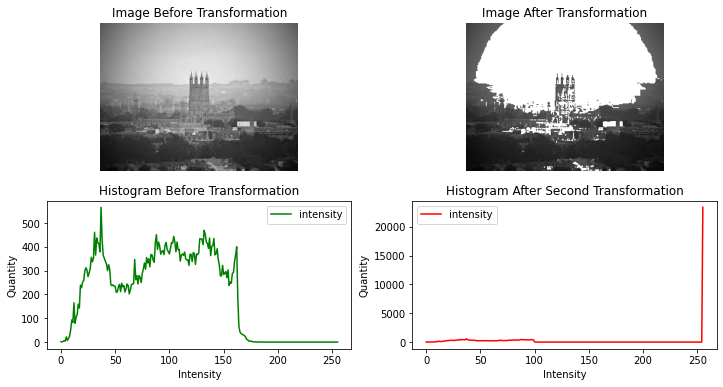

In [ ]:
plt.figure(figsize=(12,6))
# Before Transformation

# Image
plt.subplot(2,2,1)
plt.title('Image Before Transformation')
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')

# Histogram
plt.subplot(2,2,3)
plt.title('Histogram Before Transformation')
plt.plot(intensityCounter, 'g', label = 'intensity')
plt.legend(loc = 'best')
plt.xlabel('Intensity')
plt.ylabel('Quantity')

# After Second Transformation

# Image
plt.subplot(2,2,2)
plt.title('Image After Transformation')
plt.imshow(transformation_2, cmap='gray')
plt.axis('off')

# Histogram
plt.subplot(2,2,4)
plt.title('Histogram After Second Transformation')
plt.plot(intens_ctr_2, 'r', label = 'intensity')
plt.legend(loc = 'best')
plt.xlabel('Intensity')
plt.ylabel('Quantity')
plt.show()

## Visualizing for Overall Before and After both Transformation

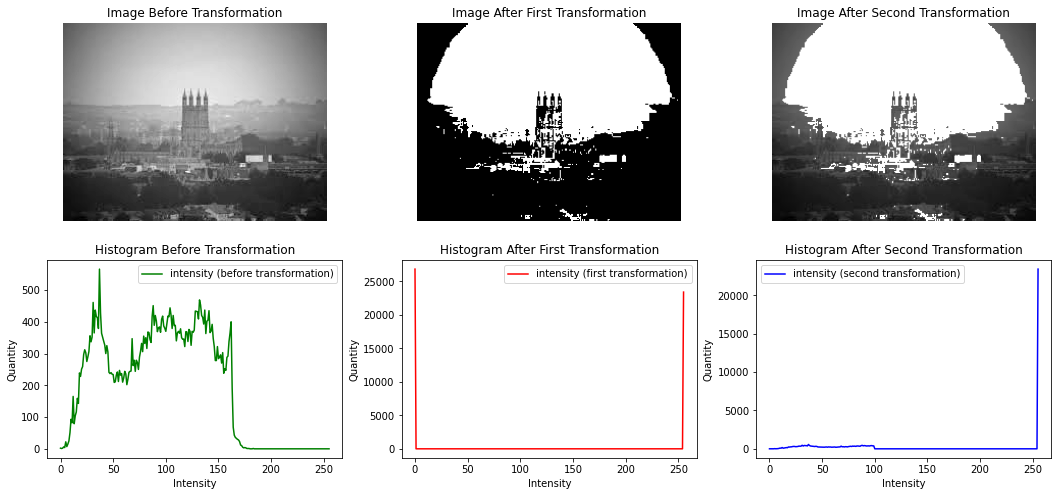

In [ ]:
plt.figure(figsize=(18,8))
# Before Transformation

# Image
plt.subplot(2,3,1)
plt.title('Image Before Transformation')
plt.imshow(grayscale_img, cmap='gray')
plt.axis('off')

# Histogram
plt.subplot(2,3,4)
plt.title('Histogram Before Transformation')
plt.plot(intensityCounter, 'g', label = 'intensity (before transformation)')
plt.legend(loc = 'best')
plt.xlabel('Intensity')
plt.ylabel('Quantity')

# After First Transformation

# Image
plt.subplot(2,3,2)
plt.title('Image After First Transformation')
plt.imshow(transformation, cmap='gray')
plt.axis('off')

# Histogram
plt.subplot(2,3,5)
plt.title('Histogram After First Transformation')
plt.plot(intens_ctr, 'r', label = 'intensity (first transformation)')
plt.legend(loc = 'best')
plt.xlabel('Intensity')
plt.ylabel('Quantity')

# After Second Transformation

# Image
plt.subplot(2,3,3)
plt.title('Image After Second Transformation')
plt.imshow(transformation_2, cmap='gray')
plt.axis('off')

# Histogram
plt.subplot(2,3,6)
plt.title('Histogram After Second Transformation')
plt.plot(intens_ctr_2, 'b', label = 'intensity (second transformation)')
plt.legend(loc = 'best')
plt.xlabel('Intensity')
plt.ylabel('Quantity')
plt.show()